# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Открываем файл с данными и изучаем общую информацию

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

In [ ]:
# Указываем имя файла, который необходимо открыть
file_name = 'real_estate_data.csv'

try:
    # Пытаемся открыть файл по пусти Я.Практикума
    df = pd.read_csv(f'/datasets/{file_name}', sep='\t')
except:
    # Если не получается, подгружаем из G.Drive
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv(f'/content/drive/MyDrive/datasets/{file_name}', sep='\t')

# Копируем датасет и выводим первые 20 строк
data = df.copy()
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Наблюдение:** в данных присутствуют пропуски. Формат datetime "%Y-%m-%dT%H:%M:%S"



In [ ]:
# Посмотрим на общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
# Заменим название столбца cityCenters_nearest на city_centers_nearest
data.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest'
}, inplace=True)

In [ ]:
# Выведим описание каждого столбца
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
# Посмортим на корреляцию значений
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


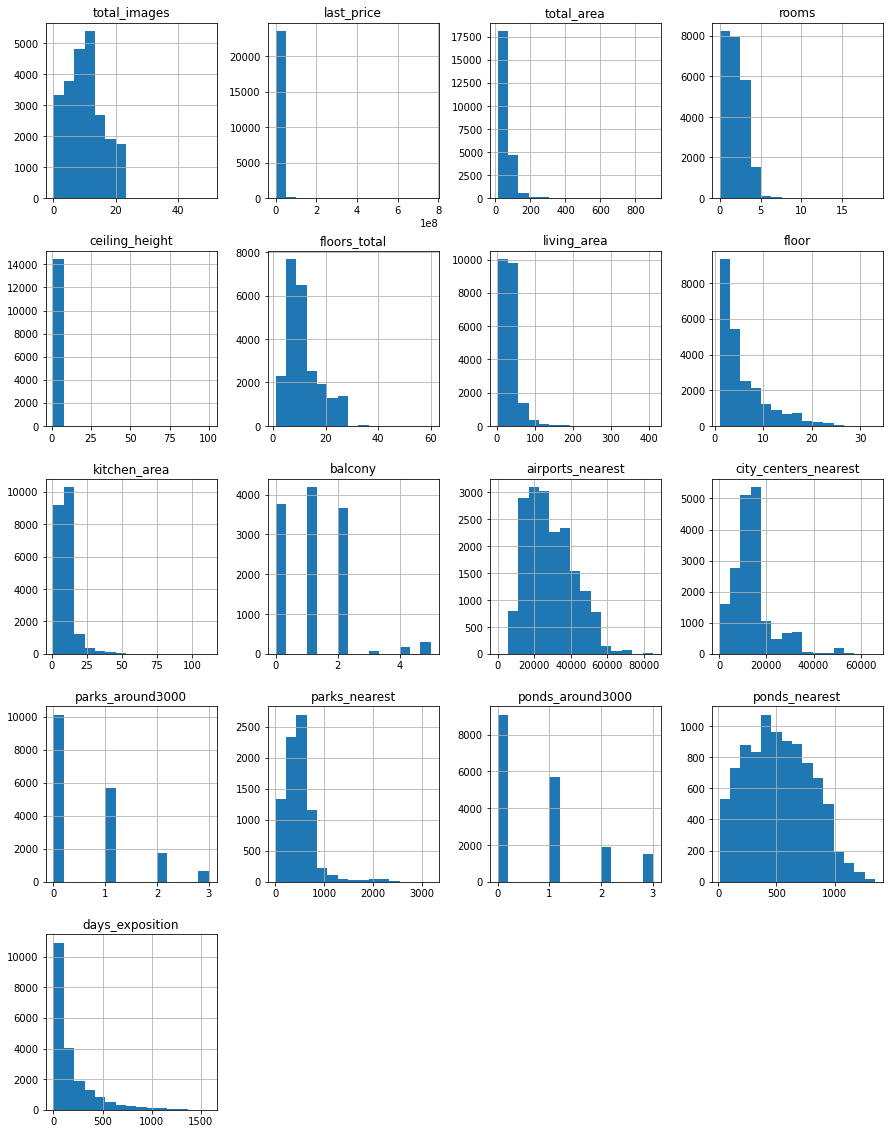

In [ ]:
# Отобразим гистограммы по каждому столбцу (по 15 корзинок, размером 15 на 20)
data.hist(bins=15, figsize=(15,20));

In [ ]:
# Функция для отображения общей информации
def main_info(data_frame):
    print('___')
    print(data_frame.info())
    print('___')
    print(data_frame.columns)
    print('___')
    print(data_frame.describe())
    print('___')
    print(data_frame.isna().sum())
    print('___')
    print(data_frame.head())

In [ ]:
main_info(data)

___
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_neares

**Вывод:**

Был прогружен датасет, которые содержит в себе данные по объявлениям недвижимости на продажу в Ленинградской области.

Датасет содержит следуюущие столбцы:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

**Наблюдения:**

- Максимальное количество строк 23699 (22 столбца)
- first_day_exposition - неверный тип данных *object* (надо исправить на *datetime*)
- ceiling_height - пропуски в данных
- floors_total - пропуски в данных и неверный тип *float64* (исправить на *int*)
- living_area - пропуски в данных
- is_apartment - пропуски в данных и неверный тип *object* (исправить на *bool*)
- kitchen_area - пропуски в данных
- balcony - пропуски данных и неверный тип *float64* (исправить на *int*)
- locality_name - пропуски
- airports_nearest - пропуски
- cityCenters_nearest - пропуски (переименовать столбцец)
- parks_around3000 - пропуски и неверный тип *float64* (исправить на *int*)
- parks_nearest - пропуски (исправить на *int*)
- ponds_around3000 - пропуски (исправить на *int*)
- ponds_nearest - пропуски (исправить на *int*)
- days_exposition - пропуски в данных и неверный тип *float64* (исправить на *int*)


### Предобработка данных

In [ ]:
# Проверим количество пропускам в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**ceiling_height** - высота потолка пропущенна из-за незнания велечины владельцем? Трудно предположить от чего сильнее всего зависит высота потолка, оставляем как есть

**floor_total** - скорее всего пропущенные значения, если дом одноэтажный (частный), поэтому заменяем на 1

In [ ]:
data['floors_total'].fillna(1, inplace=True)

**living_area** - жилая площадь. Причина пропуска человеческий фактор, либо ошибка при выгрузке данных. Заполнить медианным значением по количеству комнат?

In [ ]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room), 'living_area'].median()

**is_apartment** - интересный тип пропусков. Вероятнее всего ошибка при выгрузке т.к. очень большое количество. Возможно неоходимо заменить на False?

In [ ]:
data['is_apartment'].fillna(False, inplace=True)

**kitchen_area** - площадь кухни. Если не указали - видимо квартира студия. Можем заменить на 0 (Решено оставить как есть)

In [ ]:
# Эти пропуски не обрабатываем
# data['kitchen_area'].fillna(0, inplace=True)

**balcony** - аналогично площади кухни, если не указали, значит балконов в квартире нет. Пропуски меняем на 0

In [ ]:
data['balcony'].fillna(0, inplace=True)

**locality_name** - пропуски в названиях населённого пункта. Восполнить пропуски не сможем. Оставляем как есть

**parks_around3000 и ponds_around3000** - количество парков в радиусе 3км, если не указали, значит кол-во парков 0. (Данные лучше не менять т.к. не знаем точно, чем лучше заполнить пропуски)

In [ ]:
# Эти пропуски не обрабатываем
# data['parks_around3000'].fillna(0, inplace=True)
# data['ponds_around3000'].fillna(0, inplace=True)

**city_centers_nearest** - пропуски в этом столбце означают нахождение недвижимости в центре. Меняем NaN на 0. (Данные лучше не менять т.к. не знаем точно, чем лучше заполнить пропуски)

In [ ]:
# Эти пропуски не обрабатываем
# data['city_centers_nearest'].fillna(0, inplace=True)

**days_exposition** - количсетво размещенных дней. Скорее всего проуск говорит о точ, что объявление было размещено менее 1 дня. Условно можно округлить и сказать, что оно было размещено 1 день (Гипотеза неверна, оставляем пропуски как есть)

In [ ]:
# Думаю стоит заменить на очень большое (т.к. ещё активны)
# data['days_exposition'].fillna(999999, inplace=True)

# Если есть пропуски - значит объявление ещё активно
data['days_exposition'] = data['days_exposition'].fillna(-1)
data['days_exposition'] = data['days_exposition'].astype(int)
data['days_exposition'] = data['days_exposition'].replace(-1, np.nan)

**Остальные** переменные пока оставим без изменения

Перепроверим заполнение пропусков

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Замена типа datetime**

Так как столбец first_day_exposition иммет тип данных 'object' необходимо заменить его тип на datetime

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1H') # округляем до ближайшего значения с шагом в один час
print(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


Столбец **is_apartment** имеет тип данных object. Необходимо заменить на bool, т.к. столбце имеет только True  или False

In [ ]:
data['is_apartment'] = data['is_apartment'].astype(bool)
print(data['is_apartment'])

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool


Столбец **balcony** иммет тип float, хотя должен быть int64 потому что не может быть 1,4 балкона. Либо 1, либо 2

In [ ]:
data['balcony'] = data['balcony'].astype(int)
print(data['balcony'])

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64


Столбец **days_exposition** необходимо привести к типу **int64**, т.к. количеству размещенных дней может соответствовать только целое число

In [ ]:
# Мы заменили тип данных на int кодом выше (18 ячейка)
# data['days_exposition'] = data['days_exposition'].astype(int)
print(data['days_exposition'])

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23699, dtype: float64


In [ ]:
# Заменим float64 на float32 для экономии памяти
for column_name in data.columns:
    if data[column_name].dtype == 'float64':
        data[column_name] = data[column_name].astype('float32')

In [ ]:
# Перепроверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float32       
 6   floors_total          23699 non-null  float32       
 7   living_area           23699 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float32       
 13  balcony         

**Удаление дубликатов**

Явные дубликаты

In [ ]:
print(f'Количество явных дубликатов - {data.duplicated().sum()}')

Количество явных дубликатов - 0


Выявление неявных дубликатов

In [ ]:
# Посмотрим на даты
data['first_day_exposition'].sort_values(ascending=False)

12003   2019-05-03
14246   2019-05-03
3254    2019-05-03
12343   2019-05-03
5986    2019-05-03
           ...    
3486    2014-11-27
8393    2014-11-27
15427   2014-11-27
15857   2014-11-27
16159   2014-11-27
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

Самая рання дата 2014 год. Ожидалось увидеть 1900 год - ожидания не оправдались

In [ ]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Почему то присутствует высота потолка менее 2х метров, проверим сколько квартир для хоббитов

In [ ]:
data.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.799999,2017-08-14,2,1.20,2.0,27.500000,1,False,False,False,5.20,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.000000,2017-10-17,1,1.75,37.0,17.400000,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.000000,2018-10-31,2,1.00,12.0,32.400002,7,False,False,False,10.00,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Всего три случая, можно от них избавится, потому что очень сильно выделяется из логической картины.

Чтобы не претеснять права хоббитов исключим квартиры для великанов (Ограничим высоту потолков до 6-7 метров. )

Высота потолков выше 20 метров, так же выбивается из общего случая. Заменим эти значения на вещественные 2.0, 2.5. 

In [ ]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

In [ ]:
# Ограничим высоту потолков до 6 метров (не забываем про пропуски)
data = data.query('(2 <= ceiling_height <= 6) or (ceiling_height.isna())')

In [ ]:
# Перепроверим замену значений
data['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48,
       2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59,
       2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 ,
       2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81,
       2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92,
       2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03,
       3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14,
       3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26,
       3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37,
       3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49,
       3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 ,
       3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78,
       3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95,
       3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.

In [ ]:
data['last_price'].describe()

count        23689.0
mean       6541967.5
std       10889049.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

In [ ]:
data.sort_values(by='last_price').tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12674,16,140000000.0,241.000000,2015-07-24,5,3.00,5.0,91.785004,4,False,False,False,NaN,0,Санкт-Петербург,23512.0,3503.0,3.0,413.0,3.0,83.0,399.0
3117,19,140000000.0,631.000000,2019-03-30,7,NaN,5.0,145.000000,5,False,False,False,60.000000,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
22229,16,148000000.0,256.000000,2016-03-16,5,NaN,6.0,179.000000,5,False,False,False,36.000000,0,Санкт-Петербург,24072.0,3639.0,2.0,727.0,3.0,462.0,233.0
7857,11,150000000.0,230.000000,2017-10-25,8,NaN,8.0,220.000000,8,False,False,False,NaN,0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,135.0
15016,8,150000000.0,500.000000,2016-01-13,4,3.20,7.0,63.599998,7,False,False,False,NaN,0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
1026,20,155000000.0,310.000000,2018-10-12,5,5.30,3.0,190.000000,3,False,False,False,63.000000,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
16495,12,159000000.0,260.000000,2017-04-04,4,NaN,5.0,180.000000,4,False,False,False,30.000000,2,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,178.0
2536,16,159984000.0,242.399994,2015-08-27,4,3.85,9.0,131.000000,7,False,False,False,20.000000,0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
19155,20,160000000.0,243.000000,2018-11-12,5,NaN,5.0,145.000000,4,False,False,False,33.000000,0,Санкт-Петербург,22640.0,555.0,3.0,285.0,1.0,200.0,18.0
19865,20,180000000.0,347.000000,2015-01-21,8,3.90,6.0,260.000000,3,False,False,False,45.000000,0,Санкт-Петербург,23962.0,3794.0,2.0,537.0,3.0,501.0,834.0


In [ ]:
# Проверим цены на аномальные значения
for price in data['last_price'].sort_values().unique():
    print(price)

12190.0
430000.0
440000.0
450000.0
470000.0
480000.0
490000.0
500000.0
520000.0
530000.0
550000.0
560000.0
565000.0
580000.0
585000.0
590000.0
600000.0
620000.0
630000.0
650000.0
660000.0
680000.0
690000.0
700000.0
710000.0
720000.0
730000.0
740000.0
750000.0
760000.0
770000.0
777000.0
780000.0
790000.0
799000.0
800000.0
820000.0
850000.0
860000.0
869000.0
870000.0
880000.0
890000.0
900000.0
910000.0
920000.0
945750.0
950000.0
965780.0
970000.0
980000.0
990000.0
995000.0
999000.0
999999.0
1000000.0
1010000.0
1020000.0
1030000.0
1050000.0
1060000.0
1070000.0
1080000.0
1090000.0
1099000.0
1100000.0
1110000.0
1130000.0
1150000.0
1170000.0
1180000.0
1190000.0
1199000.0
1200000.0
1220000.0
1230000.0
1240000.0
1249000.0
1250000.0
1260000.0
1270000.0
1280000.0
1290000.0
1300000.0
1310000.0
1315000.0
1320000.0
1330000.0
1350000.0
1353000.0
1360000.0
1370000.0
1380000.0
1390000.0
1399000.0
1400000.0
1420000.0
1430000.0
1440000.0
1449900.0
1450000.0
1470000.0
1480000.0
1490000.0
1495000.0
149900

In [ ]:
len(data.query('last_price > 30000000'))

316

**Наблюдение:** в данных присутствует небольшое количество квартиры, цена которых переваливает за 30 млн. Отбросим их ради качественного анализа

In [ ]:
data[data['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


И правда, наименьшее значение - 12190. Или это двухсекционная картонная коробка в 109 квадратных метров или лучше избавится от этой строчки. Конечно, можно предположить, что забыли добавить 000, но рисковать не будем, можно ошибиться

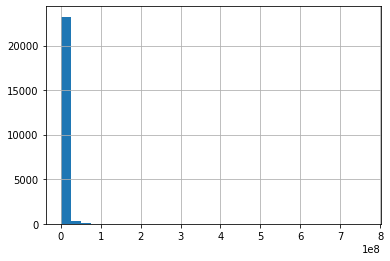

In [ ]:
# Цена объекта
data['last_price'].hist(bins=30, grid=True);

In [ ]:
data = data.query('~(last_price == 12190)')
data = data.query('~(last_price > 30000000)')

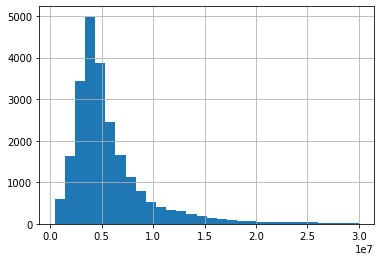

In [ ]:
# Цена объекта
data['last_price'].hist(bins=30, grid=True);

In [ ]:
# Проверим удаление
print(min(data['last_price'].unique()))
print(max(data['last_price'].unique()))

430000.0
30000000.0


In [ ]:
# Проверим аномалии в комнатах
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 16])

**Наблюдение:** в количествах комнат присутсвует как и 0, так и больше 10 комнат, посмотрим поподробнее

In [ ]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.000000,2017-03-30,0,NaN,24.0,15.500000,2,False,True,False,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.000000,2017-09-27,0,NaN,14.0,17.000000,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.110001,2018-03-12,0,NaN,17.0,24.750000,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.400002,2017-03-28,0,NaN,26.0,24.299999,19,False,False,True,NaN,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.000000,2019-02-20,0,NaN,10.0,18.000000,7,False,True,False,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.000000,2017-09-01,0,NaN,25.0,18.000000,16,False,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.700001,2017-09-28,0,NaN,24.0,18.000000,4,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.000000,2018-09-07,0,NaN,19.0,18.000000,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.000000,2017-11-11,0,NaN,9.0,18.000000,8,False,False,True,NaN,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Довольно большое количестов строк, предположим, что это студии

In [ ]:
data.query('rooms >= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.699997,2018-07-01,11,3.40,7.0,138.800003,7,False,False,False,13.300000,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.000000,2017-12-23,14,3.16,5.0,222.000000,4,False,False,False,16.600000,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.600006,2018-01-11,10,3.14,7.0,145.899994,7,False,False,False,18.799999,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
18119,4,15500000.0,216.100006,2016-07-04,10,3.15,5.0,161.399994,2,False,False,False,19.799999,0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
18848,6,28500000.0,270.000000,2015-03-02,16,3.00,4.0,180.000000,4,False,False,False,13.000000,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
20829,6,28659000.0,245.399994,2016-03-31,14,NaN,4.0,168.300003,2,False,False,False,25.900000,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


И тут не заметно очень сильно выбивающихся значений. Большие площади, много комнат, кажется всё логичным

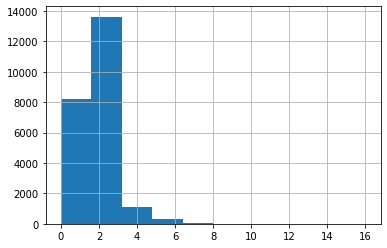

In [ ]:
data['rooms'].hist();

**Наблюдение:** на гистограмме видно, что квартир с более чем 8 комнатами не так много. Отбрасываем

In [ ]:
# Ограничим количество вомнат до 8
data = data.query('~(rooms > 8)')

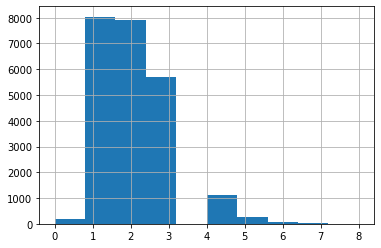

In [ ]:
data['rooms'].hist();

In [ ]:
# Провери аномалии в тотальной площади
for area in data['total_area'].sort_values().unique():
    print(area)

12.0
13.0
13.2
14.0
15.0
15.5
16.0
17.0
17.2
17.6
17.78
18.0
18.4
18.5
18.8
18.9
19.0
19.5
20.0
20.1
20.3
20.5
20.6
20.67
20.8
21.0
21.1
21.3
21.4
21.57
21.6
21.7
21.8
21.89
21.9
22.0
22.2
22.23
22.3
22.4
22.5
22.7
23.0
23.06
23.17
23.29
23.3
23.39
23.4
23.5
23.55
23.6
23.69
23.7
23.8
23.98
24.0
24.05
24.1
24.2
24.26
24.3
24.4
24.42
24.5
24.6
24.62
24.64
24.67
24.7
24.75
24.8
24.9
25.0
25.07
25.15
25.2
25.27
25.3
25.33
25.36
25.4
25.41
25.48
25.5
25.53
25.55
25.6
25.63
25.7
25.8
25.9
26.0
26.05
26.09
26.1
26.18
26.2
26.23
26.4
26.45
26.49
26.5
26.6
26.69
26.7
26.8
26.9
27.0
27.1
27.11
27.2
27.3
27.32
27.36
27.4
27.5
27.55
27.56
27.6
27.7
27.8
27.81
27.9
28.0
28.01
28.05
28.1
28.16
28.2
28.3
28.4
28.49
28.5
28.6
28.61
28.66
28.7
28.71
28.8
28.86
28.9
29.0
29.1
29.14
29.2
29.24
29.3
29.4
29.45
29.5
29.54
29.6
29.61
29.62
29.7
29.8
29.84
29.9
29.99
30.0
30.1
30.11
30.12
30.2
30.26
30.3
30.34
30.35
30.4
30.43
30.5
30.53
30.6
30.61
30.64
30.7
30.8
30.82
30.9
31.0
31.09
31.1
31.15
31.2
31.23

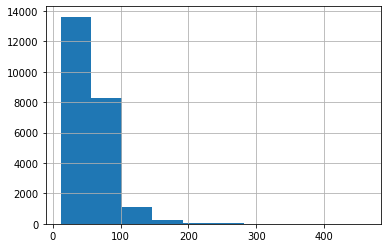

In [ ]:
data['total_area'].hist();

**Наблюдение:** как видно по гизтограмме, значений более 200 не так много. Можем отбросить?

**Наблюдение:** самая маленькая квартира 12 кв; самая большая - 900 кв. Посмотрим поближе

In [ ]:
data[data['total_area'] <= 20].sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.000000,2017-07-19,1,2.55,5.0,10.00,2,False,False,False,NaN,0,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
17961,3,1400000.0,13.000000,2017-12-03,1,2.60,9.0,17.60,1,False,False,False,NaN,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19546,3,1850000.0,13.000000,2019-03-11,1,3.40,5.0,17.60,2,False,False,False,NaN,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19807,0,3800000.0,13.000000,2018-07-04,1,NaN,5.0,10.00,3,False,False,False,NaN,0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19558,2,1686000.0,13.200000,2018-12-17,1,NaN,5.0,17.60,1,False,False,False,NaN,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19642,5,1190000.0,14.000000,2018-07-29,1,NaN,5.0,11.00,1,False,False,False,2.0,0,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
12040,5,1900000.0,15.000000,2018-06-27,1,2.50,5.0,17.60,1,False,False,False,NaN,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16949,9,1550000.0,15.000000,2018-08-21,1,2.70,9.0,17.60,1,False,False,False,NaN,0,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,42.0
8886,10,2450000.0,15.500000,2018-08-22,0,NaN,5.0,10.00,2,False,True,False,NaN,0,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9412,5,2100000.0,16.000000,2017-12-10,0,NaN,6.0,13.00,1,False,False,True,NaN,0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0


**Наблюдение:** квартира выделяется своими размерами. Смотря на объявления на авито, такие действительно есть, но почему-то хозяин не указал, что это студия. Видимо для тех, для кого размер не имеет значения. Случай интересный, трогать конечно же не будем

In [ ]:
data[data['total_area'] > 200].sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5644,6,27500000.0,201.000000,2017-08-04,7,3.20,5.0,130.000000,2,False,False,False,17.000000,0,Санкт-Петербург,24383.0,5647.0,1.0,612.0,0.0,NaN,232.0
9479,6,19000000.0,201.000000,2015-06-24,6,NaN,6.0,136.000000,2,False,False,False,20.000000,0,Санкт-Петербург,26995.0,5698.0,3.0,304.0,1.0,133.0,925.0
1187,10,25000000.0,201.000000,2015-08-07,5,3.50,6.0,131.000000,4,False,False,False,35.000000,0,Санкт-Петербург,26752.0,5458.0,3.0,445.0,0.0,NaN,1117.0
2462,18,7900000.0,201.500000,2018-08-17,7,NaN,2.0,145.000000,2,False,False,False,NaN,0,посёлок Парголово,54990.0,20665.0,0.0,NaN,0.0,NaN,35.0
2318,3,17900000.0,201.899994,2018-02-21,6,3.87,6.0,134.800003,3,False,False,False,16.200001,0,Санкт-Петербург,23915.0,3747.0,0.0,NaN,0.0,NaN,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,20,29000000.0,327.200012,2017-11-15,6,NaN,4.0,177.300003,4,False,False,False,27.100000,0,Санкт-Петербург,53531.0,18024.0,0.0,NaN,2.0,194.0,274.0
16179,11,28000000.0,336.000000,2017-09-27,5,3.00,3.0,106.099998,2,False,False,False,21.000000,1,Санкт-Петербург,15036.0,14795.0,2.0,668.0,0.0,NaN,172.0
22131,14,27000000.0,422.200012,2018-10-18,5,2.70,13.0,91.785004,11,False,False,False,NaN,0,Санкт-Петербург,46625.0,16554.0,0.0,NaN,0.0,NaN,NaN
3676,12,28789000.0,441.980011,2019-01-23,4,NaN,6.0,63.599998,6,False,False,False,35.049999,0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN


**Наблюдение:** количество квартир более 200 кв. всего 92. Думаю можно ограничить по этому показателю

In [ ]:
data = data.query('~(total_area < 15)')
data = data.query('~(total_area > 200)')

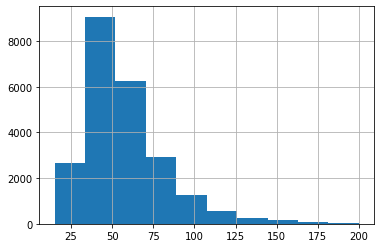

In [ ]:
data['total_area'].hist();

In [ ]:
# Посчитаем количество данных от которых мы хладнокровно избавились
data.shape[0] / df.shape[0]

0.981897970378497

**Наблюдение:** 99% данных относительно первоначальной выборки. Результат хороший, оставляем изменения

Проверим дубликаты в locality_name

In [ ]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Как видно много дубликатов, которые отличаются только буквой "ё", поэтому заменим

In [ ]:
# Заменим все буквы "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [ ]:
# Заменим дубликат "поселок городского типа Рябово" на "поселок Рябово"
data.loc[data['locality_name'] == 'поселок городского типа Рябово', 'locality_name'] = 'поселок Рябово'

### Посчитаем и добавим в таблицу новые столбцы

In [ ]:
# Цена одного квадратного метра
data['price_per_sq_meter'] = data['last_price'] // data['total_area']

In [ ]:
# День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['week_day'] = data['first_day_exposition'].dt.dayofweek

In [ ]:
# Месяц публикации объявления;
data['month_day'] = data['first_day_exposition'].dt.month

In [ ]:
# Год публикации объявления;
data['year_day'] = data['first_day_exposition'].dt.year

In [ ]:
# Тип этажа квартиры (значения — «‎первый», «последний», «другой»);
# 0 - другой
# 1 - первый
# 2 - последний
data['floor_type'] = 0
data.loc[(data['floor'] == 1), 'floor_type'] = 1
data.loc[(data['floor'] == data['floors_total']), 'floor_type'] = 2

In [ ]:
# Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['city_centers_nearest_km'] = data['city_centers_nearest'] // 1000

In [ ]:
# Проверим новые столбцы
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,week_day,month_day,year_day,floor_type,city_centers_nearest_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,0,16.0
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.0,1,12,2018,1,18.0
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.0,3,8,2015,0,13.0
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,0,8.0
5,10,2890000.0,30.400000,2018-09-10,1,NaN,12.0,14.400000,5,False,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.0,0,9,2018,0,NaN
6,6,3700000.0,37.299999,2017-11-02,1,NaN,26.0,10.600000,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.0,3,11,2017,0,19.0
7,5,7915000.0,71.599998,2019-04-18,2,NaN,24.0,30.500000,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.0,3,4,2019,0,11.0
8,20,2900000.0,33.160000,2018-05-23,1,NaN,27.0,15.430000,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.0,2,5,2018,0,NaN
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.0,6,2,2017,0,15.0
10,5,5050000.0,39.599998,2017-11-16,1,2.67,12.0,20.299999,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.0,3,11,2017,0,13.0


### Проведение исследовательского анализа данных

In [ ]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,week_day,month_day,year_day,floor_type,city_centers_nearest_km
total_images,1.000000,0.156821,0.113689,0.093661,0.030373,0.017347,0.100937,0.031684,0.013781,-0.029154,-0.023072,0.092259,0.049510,-0.002361,-0.042127,0.013408,-0.002800,-0.018582,0.001352,-0.029768,0.139384,-0.010269,0.004458,0.145326,-0.019603,-0.042228
last_price,0.156821,1.000000,0.786468,0.495931,0.498480,0.080026,0.648278,0.081907,0.019560,-0.053628,-0.035696,0.599429,0.035559,-0.033996,-0.348026,0.182818,0.043590,0.190867,-0.107495,0.129887,0.677115,-0.021249,0.004940,-0.033125,-0.075526,-0.347428
total_area,0.113689,0.786468,1.000000,0.793048,0.445992,-0.049313,0.908594,-0.022419,0.017902,-0.094176,-0.057449,0.552492,0.033065,-0.024608,-0.223230,0.133561,0.006203,0.145123,-0.073832,0.156323,0.150134,-0.015944,0.008422,-0.078465,0.007566,-0.222897
rooms,0.093661,0.495931,0.793048,1.000000,0.229116,-0.222412,0.883231,-0.157653,-0.001038,-0.158888,-0.096322,0.181158,-0.007911,-0.055848,-0.156219,0.105739,-0.043879,0.069139,-0.035964,0.115589,-0.069935,-0.004696,-0.004048,-0.046391,0.066317,-0.156283
ceiling_height,0.030373,0.498480,0.445992,0.229116,1.000000,-0.076862,0.382843,-0.041284,0.057165,0.024121,0.007197,0.383001,-0.078812,-0.102407,-0.351834,0.248786,-0.043359,0.230541,-0.131085,0.112434,0.340869,-0.019198,0.001186,-0.094851,0.029360,-0.351123
floors_total,0.017347,0.080026,-0.049313,-0.222412,-0.076862,1.000000,-0.169461,0.667740,-0.023823,0.066961,0.051901,0.221307,0.176178,0.104755,0.006027,-0.244545,0.091792,-0.115790,0.033895,-0.047396,0.247957,0.011679,0.016496,0.004922,-0.305277,0.006115
living_area,0.100937,0.648278,0.908594,0.883231,0.382843,-0.169461,1.000000,-0.113348,0.014877,-0.066750,-0.039235,0.303197,0.001704,-0.056083,-0.208752,0.145408,-0.038009,0.118824,-0.054435,0.137370,0.037643,-0.011046,-0.001673,-0.067692,0.050887,-0.208717
floor,0.031684,0.081907,-0.022419,-0.157653,-0.041284,0.667740,-0.113348,1.000000,-0.014081,0.036894,0.036532,0.168151,0.169537,0.069776,0.003730,-0.160986,0.072027,-0.074178,0.021936,-0.037850,0.194958,0.011495,0.018638,0.002910,-0.073599,0.003773
is_apartment,0.013781,0.019560,0.017902,-0.001038,0.057165,-0.023823,0.014877,-0.014081,1.000000,-0.003454,-0.002277,0.020561,0.029764,0.019583,0.014596,0.010516,-0.020633,0.014778,0.005082,-0.004742,0.018863,-0.009164,-0.003778,0.022173,0.010589,0.014051
studio,-0.029154,-0.053628,-0.094176,-0.158888,0.024121,0.066961,-0.066750,0.036894,-0.003454,1.000000,-0.004249,NaN,0.029046,-0.022235,-0.008663,-0.029605,0.008801,0.002367,0.001444,-0.022179,0.028950,-0.000757,0.000999,0.011623,-0.023244,-0.008380


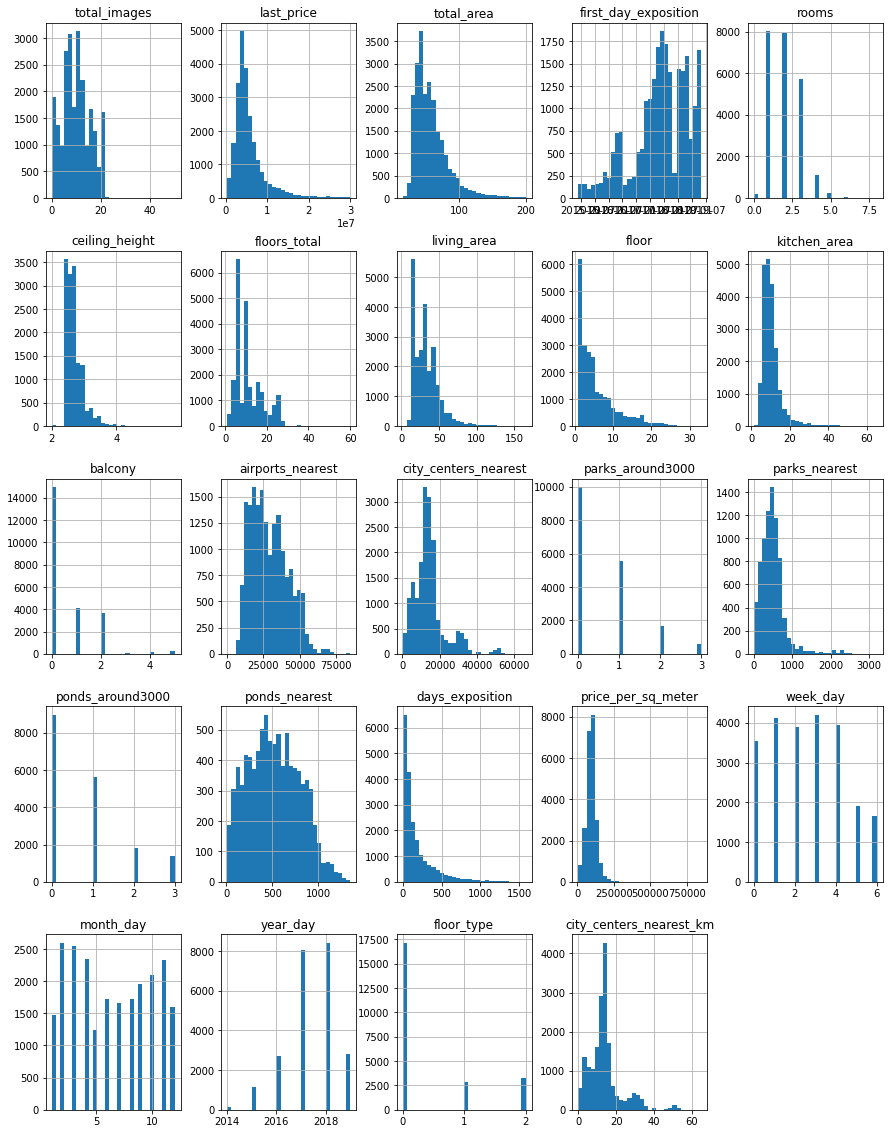

In [ ]:
data.hist(bins=30, figsize=(15,20));

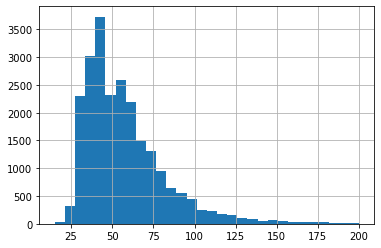

In [ ]:
# Общая площадь
data['total_area'].hist(bins=30, grid=True);

**Наблюдение:** хорошее распределение, хотя большой хвост справа. Видимо из-за значения в 900 кв.

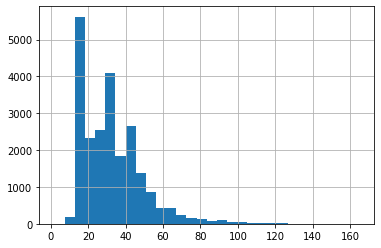

In [ ]:
# Жилая площадь
data['living_area'].hist(bins=30, grid=True);

**Наблюдение:** нормальное распределение, также заметен хвост справа

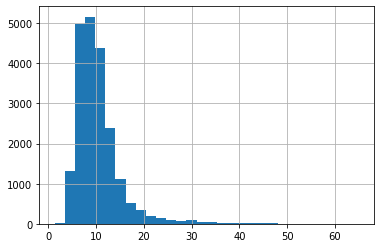

In [ ]:
# Площадь кухни
data['kitchen_area'].hist(bins=30, grid=True);

**Наблюдение:** нормальное распределение, хвост справа

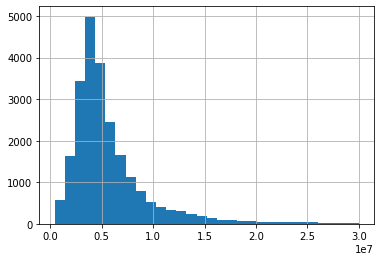

In [ ]:
# Цена объекта
data['last_price'].hist(bins=30, grid=True);

In [ ]:
print(data['last_price'].mean())
print(data['last_price'].median())

5679448.0
4600000.0


**Наблюдение:** нормальное распределение

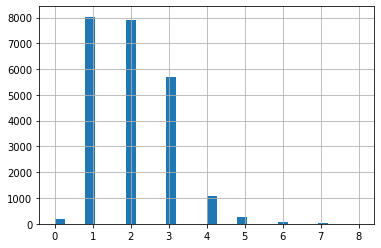

In [ ]:
# Количество комнат
data['rooms'].hist(bins=30, grid=True);

**Наблюдение:** нормальное распределение. Большое количество двухкомнтаных

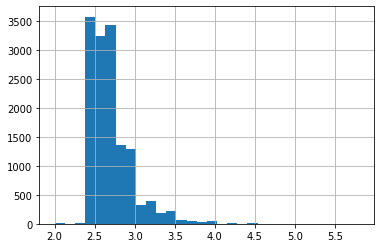

In [ ]:
# Высота потолков
data['ceiling_height'].hist(bins=30, grid=True);

**Наблюдение:** нормальное распределение. Преобладают квартиры с высосто в 2,5м

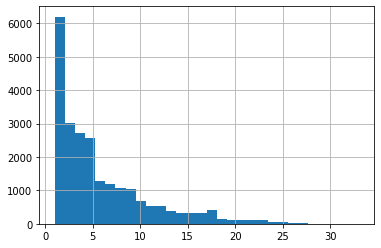

In [ ]:
# Этаж квартиры
data['floor'].hist(bins=30, grid=True);

**Наблюдение:** нормальное распределение. В большинстве своём до 5 этажей

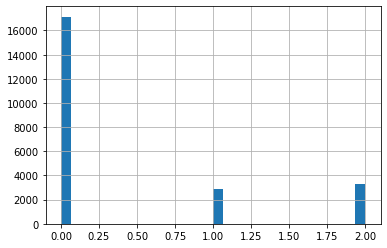

In [ ]:
# тип этажа квартиры («первый», «последний», «другой»); 1 - первый, 2 - последний, 0 - другой
data['floor_type'].hist(bins=30, grid=True);

**Наблюдение:** нормальное распределение. Преимущественное между первым и последним этажами

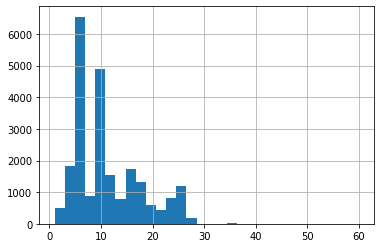

In [ ]:
# общее количество этажей в доме;
data['floors_total'].hist(bins=30, grid=True);

**Наблюдение:** Большой провал в 8 этажках. Видимо из-за большого количсетва корзин, при построении гистограммы

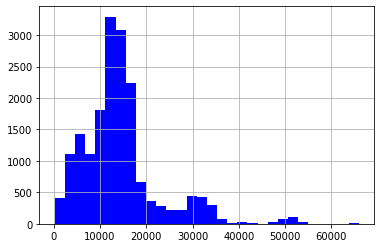

In [ ]:
# расстояние до центра города в метрах;
data['city_centers_nearest'].hist(bins=30, grid=True, color='b');

**Наблюдение:** нормальное распределение. Хвост справа. Преобладают квартиры за 10км. от центра

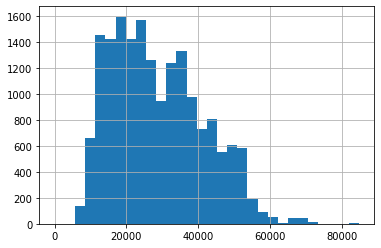

In [ ]:
# расстояние до ближайшего аэропорта;
data['airports_nearest'].hist(bins=30, grid=True);

**Наблюдение:** нормальное распределение. Сложно спрятаться от аэропорта в большом городе. Преобладают квартиры в 5-20км.

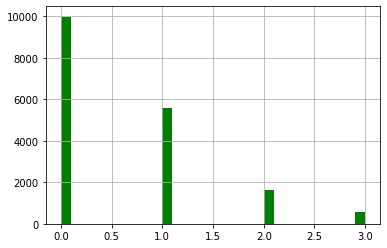

In [ ]:
# расстояние до ближайшего парка;
data['parks_around3000'].hist(bins=30, grid=True, color='g');

**Наблюдение:** Как не печально, большенство людей живёт в каменных джунглях без вида на парковых белочек

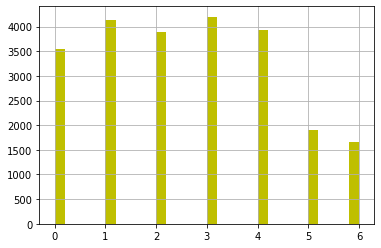

In [ ]:
# день и месяц публикации объявления.
data['week_day'].hist(bins=30, grid=True, color='y');

**Наблюдение:** В будние дни люди наиболле активно выкладывают объявления

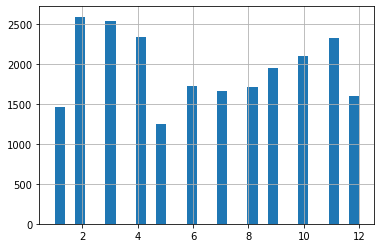

In [ ]:
data['month_day'].hist(bins=30, grid=True);

**Наблюдение:** Рост количества объявлений по продаже нежвижимости падает в летние периоды (видимо большинство в отпусках). Наибольшие пики заметны в зимне-весенний период.

**Наблюдения**:

Большее количество выборки составляют данные с большим количество комнат (общей и жилой площадью соотвественно), преимущественно на первом или около этажах. Больше всего объявлений публиковалось в будние дни, в весенний и осенний периоды года. Пик объявлений замечен в 2017 и 2018 годах.

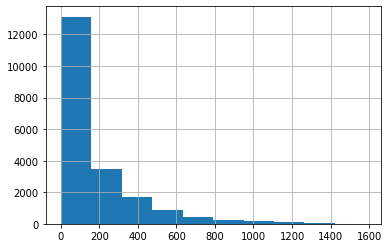

In [ ]:
data['days_exposition'].hist();

In [ ]:
len(data[data['days_exposition'].isna()]) / len(data[data['days_exposition'].notna()])

0.15260785576303929

**Наблюдение:** 15% квартир датасета ещё не продано

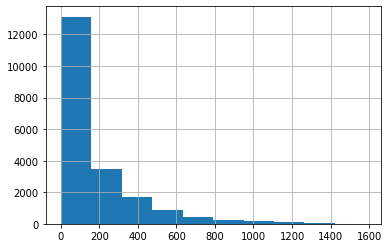

In [ ]:
data[data['days_exposition'].notna()]['days_exposition'].hist();

In [ ]:
# Посмотрим на среднеее время продажи среди проданных квартир
data[data['days_exposition'].notna()]['days_exposition'].describe()

count    20189.000000
mean       179.005295
std        217.518875
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
def categorize_days_exposition(days_count):
    try:
        if 0 <= days_count <= 7:
            return 'Очень быстро'
        elif days_count == 999999:
            return 'Ещё не продано'
        elif 8 <= days_count <= 14:
            return 'Быстро'
        elif 15 <= days_count <= 100:
            return 'Средне'
        elif 101 <= days_count <= 200:
            return 'Долго'
        elif days_count >= 201:
            return 'Очень долго'
    except:
        pass

In [ ]:
data['days_exposition_category'] = data['days_exposition'].apply(categorize_days_exposition)

In [ ]:
days_exposition = data.pivot_table(index='days_exposition_category', values=['days_exposition'], aggfunc=['count', 'mean', 'median'])
days_exposition.columns = ['Всего','Среднее', 'Медиана']
days_exposition['Доля'] = days_exposition['Всего'] / days_exposition['Всего'].sum()
days_exposition.sort_values('Среднее')

,Всего,Среднее,Медиана,Доля
days_exposition_category,,,,
Очень быстро,837,5.108722,5.0,0.041458
Быстро,912,10.975877,11.0,0.045173
Средне,8698,52.390778,48.0,0.430829
Долго,4035,144.417099,141.0,0.199861
Очень долго,5707,448.788147,374.0,0.282679


**Наблюдение**:

В среднем, самые быстрые продажи происходили за 2 дня. Самые долгие требовали более 450 дней

**Новый вывод**:
- бОльшее количество квартир продаётся в диапазоне 100 - 200 дней
- В датасете 15% квартир ещё не продано
- Среди всех квартир, среднее время продажи - 190 дней (43% случаев)
- Наибольшее время продажи 1580 дней

In [ ]:
# Посмотрим на максимум
data[data['days_exposition'] == 1580]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,week_day,month_day,year_day,floor_type,city_centers_nearest_km,days_exposition_category
18843,11,3500000.0,48.200001,2014-12-15,2,2.5,5.0,27.4,2,False,False,False,7.7,3,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580.0,72614.0,0,12,2014,0,NaN,Очень долго


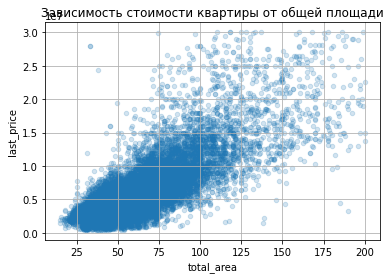

In [ ]:
data.plot(x='total_area', y='last_price', kind='scatter', title='Зависимость стоимости квартиры от общей площади', alpha=0.2, grid=True);

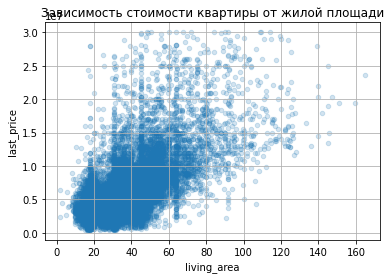

In [ ]:
data.plot(x='living_area', y='last_price', kind='scatter', title='Зависимость стоимости квартиры от жилой площади', alpha=0.2, grid=True);

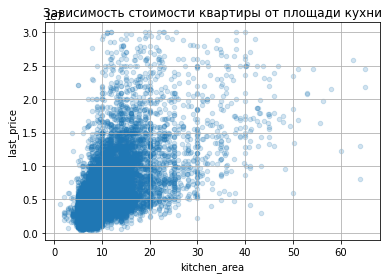

In [ ]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', title='Зависимость стоимости квартиры от площади кухни', alpha=0.2, grid=True);

**Наблюдение**: наблюдение неоднозначное. Можно сделать вывод, цена квартиры не зависит от общей квадратуры (жилой и площади кухни). 

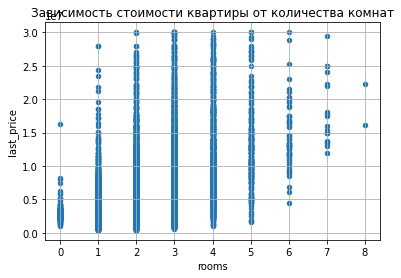

In [ ]:
data.plot(x='rooms', y='last_price', kind='scatter', title='Зависимость стоимости квартиры от количества комнат', alpha=1, grid=True);

**Наблюдение**: на графике видно, что наибольший диапазон цен приобладает в количестве комнат от 3 до 5. Можно сделать промежуточный вывод: цена квартиры слабо зависит от количества комнат

In [ ]:
# Корреляция стоимости от общей площади
print(data['last_price'].corr(data['total_area']))

# Корреляция стоимости от жилой площади
print(data['last_price'].corr(data['living_area']))

# Корреляция стоимости от площади кухни
print(data['last_price'].corr(data['kitchen_area']))

# Корреляция стоимости от количества комнат
print(data['last_price'].corr(data['rooms']))

0.7864675525275103
0.6482784562762725
0.5994285458211727
0.49593138238107837


**Новый вывод:** в целом можно сказать:
- Стоимость прямопропорциональна общей площади квартиры
- Наибольше влияние на цену оказывает размер жилой площади

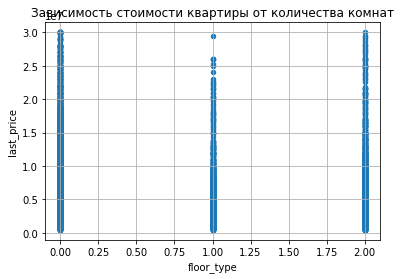

In [ ]:
data.plot(x='floor_type', y='last_price', kind='scatter', title='Зависимость стоимости квартиры от количества комнат', alpha=1, grid=True);

**Наблюдение**: мизерный диапазон цен на квартиры наблюдается в категории "первый этаж"

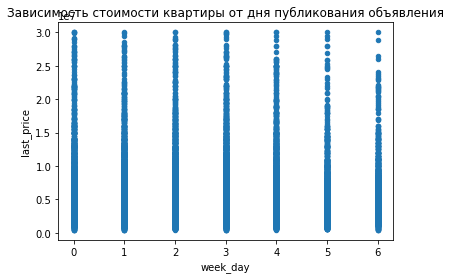

In [ ]:
data.plot(x='week_day', y='last_price', kind='scatter', title='Зависимость стоимости квартиры от дня публикования объявления');

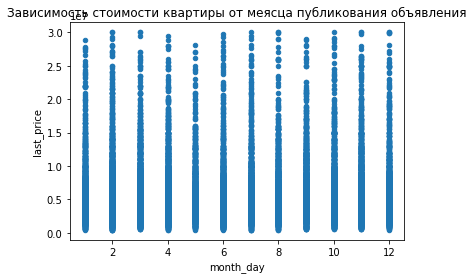

In [ ]:
data.plot(x='month_day', y='last_price', kind='scatter', title='Зависимость стоимости квартиры от меясца публикования объявления');

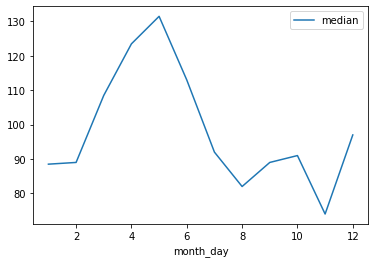

In [ ]:
# Датасет только проданных квартир
clear_data = data.query('days_exposition != 999999')

# Посмотрим, зависит ли скорость продажи от месяца публикации
month_day_corr = clear_data.pivot_table(index='month_day', values=['days_exposition'], aggfunc=['median'])
month_day_corr.columns = ['median']
month_day_corr.plot();

**Наблюдение**: если выложить объявление в марте, апреле , быстрых результатов не ждите.

In [ ]:
# Среднее время продажи, если постить весной
clear_data.query('month_day == 5')['days_exposition'].median()

131.5

**Наблюдение**: Среднее время продажи квартиры, объявление которой запостили весной - 150 дней. Лучше постить в ноябре

In [ ]:
# Среднее время продажи, если постить в ноябре
clear_data.query('month_day == 11')['days_exposition'].median()

74.0

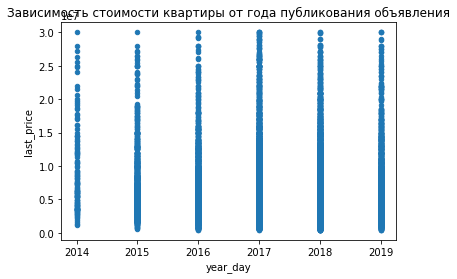

In [ ]:
data.plot(x='year_day', y='last_price', kind='scatter', title='Зависимость стоимости квартиры от года публикования объявления');

<AxesSubplot:xlabel='year_day'>

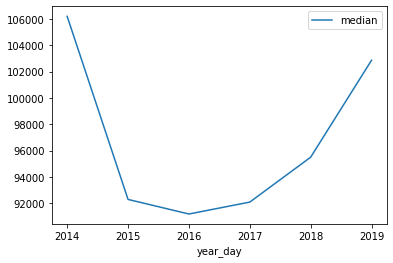

In [ ]:
year_price = data.pivot_table(index='year_day', values=['price_per_sq_meter'], aggfunc=['median'])
year_price.columns = ['median']
year_price.plot()

**Наблюдение:** Наибольшая стоимость на квартиры наблюдалась в 2017 году

In [ ]:
most_post_city = data.pivot_table(index='locality_name', values=['price_per_sq_meter'], aggfunc=['count', 'mean'])
most_post_city.columns = ['count', 'mean']
most_post_city = most_post_city.sort_values(by='count', ascending=False).head(10)
#Максимальная цена за квадратный метр
max_price = most_post_city[most_post_city['mean'] == most_post_city['mean'].max()]
##Минимальная цена за квадратный метр
min_price = most_post_city[most_post_city['mean'] == most_post_city['mean'].min()]
most_post_city.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,15309,110617.734375
Пушкин,364,103122.093750
деревня Кудрово,299,92473.070312
поселок Парголово,326,90331.835938
поселок Мурино,556,85681.296875
поселок Шушары,440,78676.898438
Колпино,337,75332.867188
Гатчина,307,68745.695312
Всеволожск,398,68654.007812


In [ ]:
#Максимальная цена за квадратный метр
max_price

,count,mean
locality_name,,
Санкт-Петербург,15309,110617.734375


In [ ]:
##Минимальная цена за квадратный метр
min_price

,count,mean
locality_name,,
Выборг,237,58141.488281


**Наблюдение:** самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут вместо таблицы можно построить гистограмму, так будет более наглядно)
</div>

In [ ]:
saint_petersburg = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values=['price_per_sq_meter'], aggfunc=['mean'])
saint_petersburg.columns = ['mean']
saint_petersburg

,mean
city_centers_nearest_km,
0.0,133508.781250
1.0,138741.312500
2.0,121567.335938
3.0,119630.976562
4.0,131020.039062
5.0,131898.953125
6.0,132273.250000
7.0,127902.132812
8.0,119151.640625


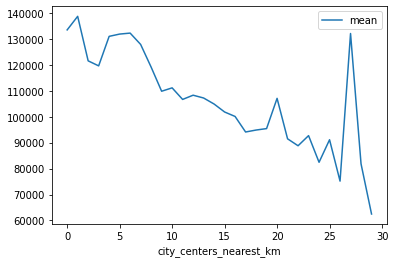

In [ ]:
saint_petersburg.plot();

Можем посмотреть на зависимость цены от отдаления от центра

In [ ]:
spb_center = data.query('locality_name == "Санкт-Петербург"')
spb_center['price_per_sq_meter'].corr(spb_center['city_centers_nearest_km'])

-0.3358581809822374

**Наблюдение:** Заметна зависимость - чем дальше от центра, тем меньше цена

### Общий вывод

**Вывод:** В данной работе мы провели исследовательский анализ данных объявлений по продаже недвижимости в Ленинградской области в период с 2014 по 2019 года.

Для предобработки данных, мы использовали следующие методы:
- Определи пропуски в данных и заменили, там, где это возможно
- Определили явные несоотвествия типов данных и также провели замену
- Проверили наличие явных дубликатов и пропработали моменты с неявными дубликатами
- Ограничили набор данных, а именно
    - Диапазон стоимости - от 400 тыс. до 30 млн.
    - Диапазон высоты потолков - от 2 м. до 6 м.
    - Диапазон кол-ва комнат - до 8 комнат
    - Диапазон общей площади - до 200 кв. м.
- Добавили новые метрики (столбцы) в датасет, а именно:
    - Цена за квадратный метр
    - День недели, месяц, год публикации
    - Расстояние до центра в километрах
    - Сделали сегментацию данных по этажу квартиры (первый, последний, другой)


Последеюущий анализ данных показал:
- Мы определили, что цены на недвжимость имеют тенденцию роста (начиная с 2015 года)
- Самая высокая цена за кв. метр - г. Санкт-Петербург (115.706), самая маленькая - г. Выборг (58.000)
- В г. Санкт-Петербург наблюдается рост цен при приближении к центру (в радиусе 7 км. от центра)
- Цена за кв. метр больше всего зависит от **этажа, количества комнат и приближение к центру**
- Среднее время продажи недвижимости по всем объявлениям - 190 дней
- Зависимость сокрости продажи от месяца публикации объявления показала, что при публикации в марте или апреле, в среднем пройдёт 150 дней, прежде чем её купят. Быстрее купят квартиру, которую запостили в ноябре - 86 дней.
- Днём активность пользователей больше, поэтому скорость продажи в будние дни возрастает